# 🛍️ Análise de Vendas - Walmart 

## 🔍 Roteiro de Análises e Visualizações

### 1. 📊 **Resumo Geral**
- Receita total
- Número total de clientes
- Ticket médio por cliente
- Total de clientes recorrentes

### 2. 🧺 **Análises por Categoria e Produto**
- Top 10 produtos mais vendidos
- Categorias mais populares
- Receita por categoria

### 3. 🗺️ **Análises por Cidade ou Bairro**
- Receita por cidade
- Comparação de ticket médio entre cidades
- Perfil demográfico por cidade

### 4. 👤 **Comportamento do Cliente**
- Distribuição por idade/gênero
- Taxa de retorno (clientes recorrentes)
- Avaliação média dos produtos

### 5. 📈 **Vendas ao Longo do Tempo**
- Gráfico de vendas por dia, semana ou mês
- Efeito de descontos nas vendas

### 6. 💳 **Forma de Pagamento**
- Quais métodos são mais usados?
- Comparar ticket médio por método

---

📌 Ao longo do projeto, gráficos, tabelas e comentários serão utilizados para facilitar a interpretação e sugerir melhorias no desempenho comercial com base nos dados disponíveis.


In [2]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from io import BytesIO

In [3]:
#Importar os dados
df = pd.read_excel(r'C:\Users\jgmat\Downloads\archive\data\walmart_data.xlsx')

In [4]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       50000 non-null  object        
 1   Age               50000 non-null  int64         
 2   Gender            50000 non-null  object        
 3   City              50000 non-null  object        
 4   Category          50000 non-null  object        
 5   Product_Name      50000 non-null  object        
 6   Purchase_Date     50000 non-null  datetime64[ns]
 7   Purchase_Amount   50000 non-null  float64       
 8   Payment_Method    50000 non-null  object        
 9   Discount_Applied  50000 non-null  object        
 10  Rating            50000 non-null  int64         
 11  Repeat_Customer   50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 4.6+ MB


In [6]:
df.describe()

,Age,Purchase_Date,Purchase_Amount,Rating
count,50000.000000,50000,50000.000000,50000.000000
mean,38.945220,2024-08-10 17:54:09.216000512,255.532230,2.998680
min,18.000000,2024-02-10 00:00:00,10.010000,1.000000
25%,28.000000,2024-05-11 00:00:00,133.050000,2.000000
50%,39.000000,2024-08-11 00:00:00,255.045000,3.000000
75%,50.000000,2024-11-10 00:00:00,378.912500,4.000000
max,60.000000,2025-02-09 00:00:00,499.990000,5.000000
std,12.398137,NaN,141.574416,1.417956


In [7]:
df.isnull().sum()


Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [8]:
df.duplicated().sum()

0

1.Resumo Geral

In [10]:
# Receita total
receita_total = df['Purchase_Amount'].sum()

# Total de clientes únicos
clientes_unicos = df['Customer_ID'].nunique()

# Ticket médio
ticket_medio = receita_total / clientes_unicos

# Clientes recorrentes
clientes_recorrentes = df[df['Repeat_Customer'] == 'Yes']['Customer_ID'].nunique()

print(f"Receita Total: R${receita_total:,.2f}")
print(f"Total de Clientes: {clientes_unicos}")
print(f"Ticket Médio: R${ticket_medio:,.2f}")
print(f"Clientes Recorrentes: {clientes_recorrentes}")

Receita Total: R$12,776,611.48
Total de Clientes: 50000
Ticket Médio: R$255.53
Clientes Recorrentes: 25244


In [11]:
imagens = []

In [12]:
# --- Dados calculados ---
receita_total = df['Purchase_Amount'].sum()
clientes_unicos = df['Customer_ID'].nunique()
ticket_medio = receita_total / clientes_unicos
clientes_recorrentes = df[df['Repeat_Customer'] == 'Yes']['Customer_ID'].nunique()

# --- Criar figura estilo KPI ---
fig, ax = plt.subplots(figsize=(10, 3))
fig.patch.set_facecolor('white')
ax.axis('off')  # remove os eixos

# Textos dos KPIs
kpis = [
    ("Receita Total", f"R${receita_total:,.2f}"),
    ("Clientes Únicos", f"{clientes_unicos:,}"),
    ("Ticket Médio", f"R${ticket_medio:,.2f}"),
    ("Clientes Recorrentes", f"{clientes_recorrentes:,}")
]

# Mostrar os KPIs lado a lado
for i, (titulo, valor) in enumerate(kpis):
    ax.text(0.1 + i * 0.22, 0.6, titulo, fontsize=12, fontweight='bold', ha='center')
    ax.text(0.1 + i * 0.22, 0.3, valor, fontsize=20, color='#007ACC', ha='center')

plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

2. Análises por Categoria e Produto

In [14]:
#Receita Total por Categoria

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Purchase_Amount', estimator=sum, errorbar=None, hue='Category', palette='viridis', legend=False)
plt.title("Receita Total por Categoria")
plt.ylabel("Receita ($)")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [15]:
#Ticket Médio por Categoria
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Purchase_Amount', estimator=np.mean, ci=None, palette='coolwarm')
plt.title("Ticket Médio por Categoria")
plt.ylabel("Valor Médio por Compra (R$)")
plt.xlabel("Categoria")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\904471648.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Purchase_Amount', estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\904471648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Purchase_Amount', estimator=np.mean, ci=None, palette='coolwarm')


In [16]:
#Produtos mais vendidos (por quantidade de vendas)
top_produtos = df['Product_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='crest')
plt.title("Top 10 Produtos Mais Vendidos (Quantidade)")
plt.xlabel("Número de Vendas")
plt.ylabel("Produto")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\899178496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index, palette='crest')


In [17]:
#Produtos com maior Receita Total
produto_receita = df.groupby('Product_Name')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=produto_receita.values, y=produto_receita.index, palette='magma')
plt.title("Top 10 Produtos com Maior Receita")
plt.xlabel("Receita Total (R$)")
plt.ylabel("Produto")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\1856920343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produto_receita.values, y=produto_receita.index, palette='magma')


In [18]:
#Produtos com Melhor Avaliação (Rating)
produto_rating = df.groupby('Product_Name')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=produto_rating.values, y=produto_rating.index, palette='flare')
plt.title("Top 10 Produtos com Melhor Avaliação Média")
plt.xlabel("Avaliação Média")
plt.ylabel("Produto")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\2273682797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produto_rating.values, y=produto_rating.index, palette='flare')


3. Top cities

In [20]:
#Cidades com Maior Receita
top_cities = df.groupby('City')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='muted')
plt.title("Top 10 Cidades com Maior Receita")
plt.xlabel("Receita Total R$")
plt.ylabel("Cidade")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\2162860279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='muted')


In [21]:
#Top Cidades por Ticket Médio
top_cidades = (
    df.groupby("City")["Purchase_Amount"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plotando com Matplotlib
plt.figure(figsize=(10,6))
top_cidades.plot(kind='barh', color='skyblue')
plt.xlabel("Ticket Médio (R$)")
plt.title("Top 10 Cidades por Ticket Médio")
plt.gca().invert_yaxis()  # para mostrar o maior no topo
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual


In [22]:
# Ticket Médio por Cidade
ticket_medio = (
    df.groupby("City")["Purchase_Amount"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14,6))
ticket_medio.plot(kind="line", marker="o")
plt.title("Ticket Médio por Cidade (Ordenado)")
plt.xlabel("Cidade")
plt.ylabel("Ticket Médio (R$)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [23]:
# Top 10 cidades por receita
top_cities = df.groupby("City")["Purchase_Amount"].sum().nlargest(10).index
df_top = df[df["City"].isin(top_cities)]

# Proporção de clientes recorrentes por cidade
repeat_rate = (
    df_top.groupby(["City", "Repeat_Customer"])
    .size()
    .unstack(fill_value=0)
)

repeat_rate["Total"] = repeat_rate.sum(axis=1)
repeat_rate["% Recorrentes"] = (repeat_rate["Yes"] / repeat_rate["Total"]) * 100
repeat_rate = repeat_rate.sort_values(by="% Recorrentes", ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x="% Recorrentes",
    y=repeat_rate.index,
    data=repeat_rate.reset_index(),
    palette="Greens_d"
)

for i, v in enumerate(repeat_rate["% Recorrentes"]):
    plt.text(v - 2, i, f'{v:.1f}%', color='white', va='center', ha='right', fontweight='bold')

plt.title("Clientes Recorrentes nas Top 10 Cidades por Receita")
plt.xlabel("Porcentagem de Clientes Recorrentes")
plt.ylabel("Cidade")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\2851255123.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [24]:
# Contagem por gênero
genero_count = df_top.groupby(["City", "Gender"]).size().unstack(fill_value=0).reset_index()

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=genero_count.melt(id_vars="City", value_name="Contagem", var_name="Gênero"),
    x="City", y="Contagem", hue="Gênero", palette="Set2"
)
plt.title("Distribuição de Gênero nas Top 10 Cidades por Receita")
plt.xlabel("Cidade")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45)
plt.legend(title="Gênero")
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

4. Comportamento do Cliente

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\1622783841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


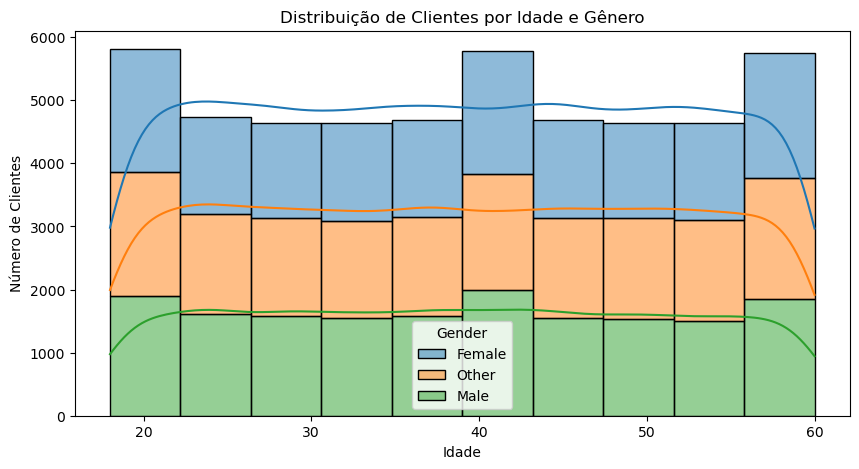

In [26]:
# Distribuição por idade
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=10, kde=True, hue='Gender', multiple='stack')
plt.title('Distribuição de Clientes por Idade e Gênero')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
#plt.show()

# Contagem por Gênero
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribuição de Clientes por Gênero')
plt.ylabel('Número de Clientes')
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [27]:
# Contagem de clientes únicos
total_clientes = df['Customer_ID'].nunique()

# Quantos clientes são recorrentes
clientes_recorrentes = df[df['Repeat_Customer'] == 'Yes']['Customer_ID'].nunique()

# Cálculo da taxa
taxa_retorno = clientes_recorrentes / total_clientes * 100
print(f'Taxa de clientes recorrentes: {taxa_retorno:.2f}%')


Taxa de clientes recorrentes: 50.49%


In [28]:
labels = ['Recorrentes', 'Novos']
sizes = [clientes_recorrentes, total_clientes - clientes_recorrentes]
colors = ['#66b3ff', '#ffcc99']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', startangle=140)
plt.title('Proporção de Clientes Recorrentes')
plt.axis('equal')
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [29]:
# Avaliação média geral
media_geral = df['Rating'].mean()
print(f'Avaliação média dos produtos: {media_geral:.2f}')

# Avaliação média por categoria
avaliacao_categoria = df.groupby('Category')['Rating'].mean().sort_values()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=avaliacao_categoria.index, y=avaliacao_categoria.values, palette='viridis')
plt.title('Avaliação Média por Categoria de Produto')
plt.ylabel('Avaliação Média')
plt.xlabel('Categoria')
plt.ylim(0, 5)
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

Avaliação média dos produtos: 3.00


C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\245520435.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacao_categoria.index, y=avaliacao_categoria.values, palette='viridis')


5. Vendas ao Longo do Tempo

In [31]:
# Converter a data
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Criar colunas auxiliares para dia, semana, mês
df['Dia'] = df['Purchase_Date'].dt.date
df['Semana'] = df['Purchase_Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Mes'] = df['Purchase_Date'].dt.to_period('M').apply(lambda r: r.start_time)

# Agrupamento diário
vendas_dia = df.groupby('Dia')['Purchase_Amount'].sum()

# Agrupamento semanal
vendas_semana = df.groupby('Semana')['Purchase_Amount'].sum()

# Agrupamento mensal
vendas_mes = df.groupby('Mes')['Purchase_Amount'].sum()

# Gráficos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(vendas_dia, label='Diário', alpha=0.5)
plt.plot(vendas_semana, label='Semanal', linewidth=2)
plt.plot(vendas_mes, label='Mensal', linewidth=3)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas')
plt.legend()
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [32]:
# Converter a data
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Criar colunas auxiliares para dia, semana, mês
df['Dia'] = df['Purchase_Date'].dt.date
df['Semana'] = df['Purchase_Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Mes'] = df['Purchase_Date'].dt.to_period('M').apply(lambda r: r.start_time)

# Agrupamentos
vendas_dia = df.groupby('Dia')['Purchase_Amount'].sum()
vendas_semana = df.groupby('Semana')['Purchase_Amount'].sum()
vendas_mes = df.groupby('Mes')['Purchase_Amount'].sum()


In [33]:
# Converter Purchase_Date para datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Colunas auxiliares para dia, semana, mês
df['Dia'] = df['Purchase_Date'].dt.date
df['Semana'] = df['Purchase_Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Mes'] = df['Purchase_Date'].dt.to_period('M').apply(lambda r: r.start_time)

# Coluna dia do mês e dia da semana (nome)
df['DiaDoMes'] = df['Purchase_Date'].dt.day
df['DiaSemana'] = df['Purchase_Date'].dt.day_name()  # nomes em português se o locale estiver ok, senão será em inglês

# Agrupamentos
vendas_dia = df.groupby('Dia')['Purchase_Amount'].sum()
vendas_semana = df.groupby('Semana')['Purchase_Amount'].sum()
vendas_mes = df.groupby('Mes')['Purchase_Amount'].sum()

# Agrupar dia do mês
vendas_por_dia_mes = df.groupby('DiaDoMes')['Purchase_Amount'].sum()

# Agrupar dia da semana (ordem padrão segunda=0 até domingo=6)
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_por_dia_semana = df.groupby('DiaSemana')['Purchase_Amount'].sum().reindex(dias_ordem)

# --- Gráficos ---

fig, axs = plt.subplots(4, 1, figsize=(14, 14))

# 1. Vendas diárias com pontos e linha
axs[0].plot(vendas_dia.index, vendas_dia.values, marker='o', linestyle='-', color='gray', alpha=0.7)
axs[0].set_title('Vendas Diárias')
axs[0].set_ylabel('Total (R$)')
axs[0].tick_params(axis='x', rotation=45)

# 2. Vendas por dia do mês (eixo X com números 1 a 31)
axs[1].plot(vendas_por_dia_mes.index, vendas_por_dia_mes.values, marker='o', linestyle='-', color='blue')
axs[1].set_title('Vendas por Dia do Mês')
axs[1].set_xlabel('Dia do Mês')
axs[1].set_ylabel('Total (R$)')
axs[1].set_xticks(range(1,32))

# 3. Vendas por dia da semana (em ordem)
axs[2].bar(vendas_por_dia_semana.index, vendas_por_dia_semana.values, color='green', alpha=0.7)
axs[2].set_title('Vendas por Dia da Semana')
axs[2].set_xlabel('Dia da Semana')
axs[2].set_ylabel('Total (R$)')
axs[2].tick_params(axis='x', rotation=45)

# 4. Vendas mensais com linha e pontos
axs[3].plot(vendas_mes.index, vendas_mes.values, marker='o', linestyle='-', color='purple')
axs[3].set_title('Vendas Mensais')
axs[3].set_xlabel('Data')
axs[3].set_ylabel('Total (R$)')
axs[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

In [34]:
# Ajustar coluna de desconto para booleano
df['Desconto'] = df['Discount_Applied'].map({'Yes': True, 'No': False})

# Comparar valores médios de vendas
vendas_com_desconto = df[df['Desconto']]['Purchase_Amount']
vendas_sem_desconto = df[~df['Desconto']]['Purchase_Amount']

# Boxplot com correção do FutureWarning
plt.figure(figsize=(6, 5))
ax = sns.boxplot(
    data=df,
    x='Discount_Applied',
    y='Purchase_Amount',
    hue='Discount_Applied',  # <- necessário para o palette funcionar sem warning
    palette='coolwarm',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
    legend=False  # <- oculta legenda duplicada
)

# Título e rótulos
plt.title('Efeito de Descontos no Valor das Compras')
plt.xlabel('Desconto Aplicado')
plt.ylabel('Valor da Compra')

# Adicionar média como anotação no gráfico
media_com = vendas_com_desconto.mean()
media_sem = vendas_sem_desconto.mean()

ax.text(0, media_com, f"R${media_com:.2f}", ha='center', va='bottom', fontsize=9, color='black')
ax.text(1, media_sem, f"R${media_sem:.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
#plt.show()

# Impressão das médias
print(f"Média com desconto: R${media_com:.2f}")
print(f"Média sem desconto: R${media_sem:.2f}")

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

Média com desconto: R$255.58
Média sem desconto: R$255.49


6. Forma de Pagamento

In [36]:
# Contagem por método
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette='Set2')
plt.title('Métodos de Pagamento Mais Usados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\2105041386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index, palette='Set2')


In [37]:
# Agrupar e calcular média
ticket_medio = df.groupby('Payment_Method')['Purchase_Amount'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=ticket_medio.index, y=ticket_medio.values, palette='coolwarm')
plt.title('Ticket Médio por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Ticket Médio (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show()

# Mostrar valores
print(ticket_medio)

#Salvar como imagem na memória
img_stream = BytesIO()
plt.savefig(img_stream, format='png', bbox_inches='tight')
img_stream.seek(0)
imagens.append(img_stream)  # adiciona a imagem à lista de gráficos
plt.close()  # limpa o gráfico atual

C:\Users\jgmat\AppData\Local\Temp\ipykernel_14848\1419182706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_medio.index, y=ticket_medio.values, palette='coolwarm')


Payment_Method
Debit Card          254.935429
Credit Card         255.243348
Cash on Delivery    255.744024
UPI                 256.217275
Name: Purchase_Amount, dtype: float64


In [38]:
!pip install python-pptx
from pptx import Presentation
from pptx.util import Inches
from io import BytesIO

In [39]:
# Create a new presentation
prs = Presentation()

# Define slide layout - 5 = Title Only, or use 6 = Blank (better for images)
blank_slide_layout = prs.slide_layouts[6]

# Loop through your list of image streams (imagens)
for i, img_stream in enumerate(imagens):
    slide = prs.slides.add_slide(blank_slide_layout)
    
    # Add image to slide, position and size in inches
    left = Inches(1)
    top = Inches(1)
    width = Inches(8)  # adjust as needed to fit your slide
    
    slide.shapes.add_picture(img_stream, Inches(0.5), Inches(0.5), width=Inches(6))

# Save the presentation
prs.save('Walmart_Analysis_Presentation.pptx')
